In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

In [2]:
df_suicide_detection = pd.read_csv('../../data/prepared/prepared.csv').drop('Unnamed: 0',axis=1)
df_suicide_detection['corpus'] = df_suicide_detection['corpus'].apply(lambda x: x[1:-1].replace("'", "").split(', '))

In [3]:
data_suicide = df_suicide_detection[df_suicide_detection['class'] == 1]
data_non_suicide = df_suicide_detection[df_suicide_detection['class'] == 0]

In [4]:
words_suicide = [word for post in data_suicide['corpus'] for word in post]
words_non_suicide = [word for post in data_non_suicide['corpus'] for word in post]

In [5]:
word_freq_suicide = Counter(words_suicide)
word_freq_non_suicide = Counter(words_non_suicide)

In [6]:
top_10_words_suicide = word_freq_suicide.most_common(10)
top_10_words_non_suicide = word_freq_non_suicide.most_common(10)

print("Top 10 words in 'suicide':\n", top_10_words_suicide)
print("Top 10 words in 'non-suicide':\n", top_10_words_non_suicide)

Top 10 words in 'suicide':
 [('im', 232492), ('want', 136668), ('feel', 127968), ('like', 114342), ('know', 97028), ('get', 95478), ('life', 93214), ('go', 92893), ('ive', 80581), ('cant', 78117)]
Top 10 words in 'non-suicide':
 [('im', 58231), ('like', 51234), ('filler', 33662), ('get', 30692), ('want', 26405), ('know', 24829), ('go', 22112), ('peopl', 21026), ('friend', 20261), ('feel', 20211)]


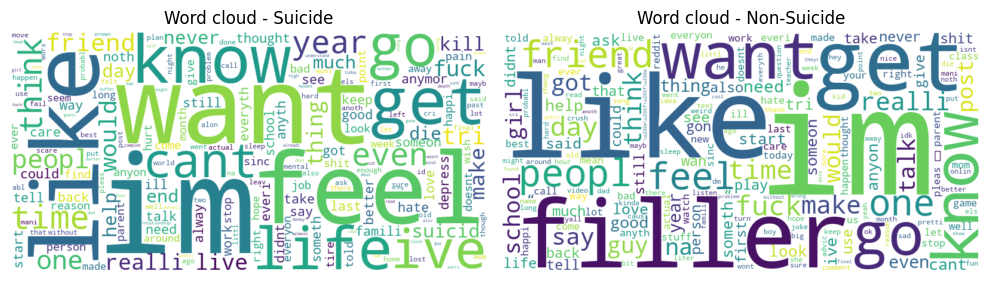

In [7]:
wordcloud_suicide = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_suicide)
wordcloud_non_suicide = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_non_suicide)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_suicide, interpolation='bilinear')
plt.title('Word cloud - Suicide')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_suicide, interpolation='bilinear')
plt.title('Word cloud - Non-Suicide')
plt.axis('off')

plt.tight_layout()
plt.show()

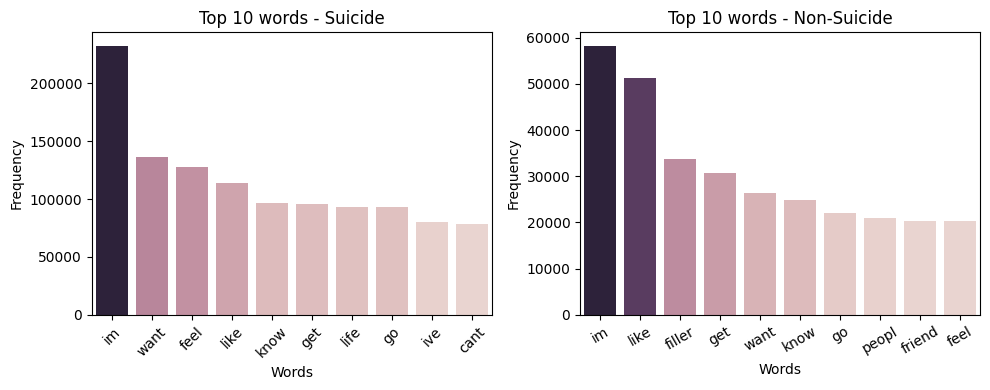

In [28]:
df_suicide = pd.DataFrame(top_10_words_suicide)
df_non_suicide = pd.DataFrame(top_10_words_non_suicide)
df_suicide.columns = df_non_suicide.columns = ["Words", "Frequency"]

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.barplot(x='Words', y='Frequency', data=df_suicide, hue="Frequency", legend=False)
plt.title('Top 10 words - Suicide')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='Words', y='Frequency', data=df_non_suicide, hue="Frequency", legend=False)
plt.title('Top 10 words - Non-Suicide')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()